In [1]:
from ip_analysis_tool.util.graph_getter import get_graph_by_date
from ip_analysis_tool.util.date_util import get_date_object
from ip_analysis_tool.accessibility_within_hops import accessibility_within_hops
from json import dump
import pandas as pd

In [2]:
data = accessibility_within_hops(get_graph_by_date(get_date_object("2013-08-05")))
print(data)
data.to_csv("scratchpad/accessibility_within_hops_2013-08-05.csv", index=False)

    distance  count  percentage  cumulative_count  cumulative_percentage
0          0      1    0.005530                 1               0.005530
1          1      3    0.016591                 4               0.022121
2          2     15    0.082955                19               0.105077
3          3    113    0.624931               132               0.730008
4          4    633    3.500719               765               4.230727
5          5   1102    6.094459              1867              10.325185
6          6   1503    8.312134              3370              18.637319
7          7   1713    9.473510              5083              28.110828
8          8   1819   10.059728              6902              38.170556
9          9   1745    9.650481              8647              47.821037
10        10   3234   17.885190             11881              65.706227
11        11   1506    8.328725             13387              74.034952
12        12   1262    6.979316             14649  

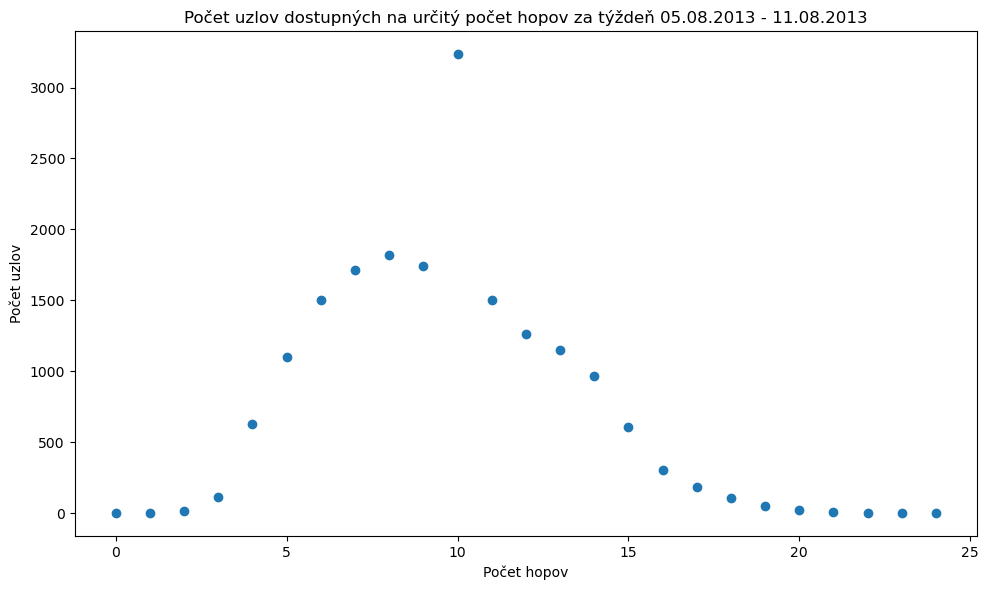

In [3]:
from ip_analysis_tool.visualize.chart import visualize_chart
visualize_chart(data=data,
                x_characteristic="distance",
                y_characteristic="count",
                title="Počet uzlov dostupných na určitý počet hopov za týždeň 05.08.2013 - 11.08.2013",
                x_label="Počet hopov",
                y_label="Počet uzlov")

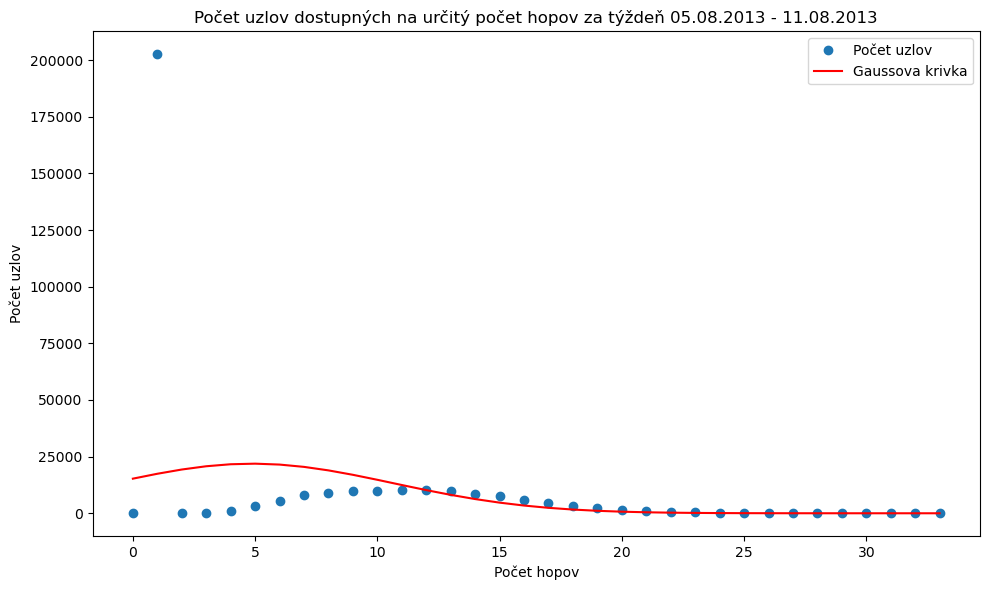

    distance   count  percentage  cumulative_count  cumulative_percentage  \
0          0       3    0.000949                 3               0.000949   
1          1  202541   64.060182            202544              64.061131   
2          2      32    0.010121            202576              64.071252   
3          3     163    0.051554            202739              64.122806   
4          4    1046    0.330832            203785              64.453638   
5          5    3244    1.026021            207029              65.479658   
6          6    5251    1.660800            212280              67.140458   
7          7    8071    2.552716            220351              69.693174   
8          8    9054    2.863622            229405              72.556796   
9          9    9856    3.117281            239261              75.674077   
10        10    9820    3.105895            249081              78.779972   
11        11   10127    3.202993            259208              81.982965   

In [6]:
from ip_analysis_tool.trend_identification import gaussian_fit
from ip_analysis_tool.visualize.chart import visualize_chart_add_line
data = gaussian_fit(data, x_characteristic="distance", y_characteristic="count")
data.to_csv("scratchpad/accessibility_within_hops_2013-08-05.csv", index=False)
visualize_chart_add_line(
    data=data,
    x_characteristic="distance",
    y_characteristic="count",
    y_line_characteristic="gauss_fit",
    title="Počet uzlov dostupných na určitý počet hopov za týždeň 05.08.2013 - 11.08.2013",
    x_label="Počet hopov",
    y_label="Počet uzlov",
    y_line_label="Gaussova krivka",
)
print(data)

In [2]:
# Entire data range
from ip_analysis_tool.visualize.chart import visualize_chart_add_line
from ip_analysis_tool.enums import TimeInterval
from ip_analysis_tool.trend_identification import gaussian_fit
data = accessibility_within_hops(get_graph_by_date(time_interval=TimeInterval.ALL))
data = gaussian_fit(data, x_characteristic="distance", y_characteristic="count")
print(data)
data.to_csv("scratchpad/accessibility_within_hops_all.csv", index=False)
visualize_chart_add_line(
    data=data,
    x_characteristic="distance",
    y_characteristic="count",
    y_line_characteristic="gauss_fit",
    title="Počet uzlov dostupných na určitý počet hopov za celý čas",
    x_label="Počet hopov",
    y_label="Počet uzlov",
    y_line_label="Gaussova krivka",
)

KeyboardInterrupt: 